# Multi-Feature Datasets

In machine learning, the value that we try to predict is called the **target**. The values used to predict the targets are called **features**. 

For instance: In the previous example, we predicted the falling time depending on the height of the data. Therefore, the time was the target, and the height was the feature. 

The true power of machine learning is unlocked when we have not a single but many different features. Let's look at such an example in more detail.

## Dataset: WHO Life Expectancy

The life expectancy dataset lists the life expectancy in different countries, together with further information about these countries. The data is from [WHO](https://www.who.int/data/gho/data/indicators) and [the world bank](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD). It was retrieved on September 2nd, 2024. For all measures, the most recent available value is considered (typically from 2022 or 2023).

We want to use this data to predict the life expectancy of a country using different economic and public health indicators, to see if there is any relationship.

### Data Loading
We can load the data as follows:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

life_expectancy = pd.read_csv("../data/who_data.csv", index_col=0)
life_expectancy.head(5)

,Country Name,population,GDP,pol3,dpt3,prevalence_obesity,fine_particular_matter,hepB,life_expectancy,CHE,prevalence_underweight,alcohol_consumption
AFG,Afghanistan,41128771.0,1.450216e+10,69.0,60.0,17.59,62.49,60.0,59.13,81.32,6.45,0.011
AGO,Angola,35588987.0,1.043997e+11,41.0,54.0,10.54,27.16,54.0,62.13,64.16,9.81,4.130
ALB,Albania,2777689.0,1.891638e+10,98.0,97.0,26.58,16.28,97.0,76.39,464.70,1.29,4.470
AND,Andorra,79824.0,3.380602e+09,97.0,98.0,20.47,8.52,97.0,NaN,3506.00,2.41,9.680
ARE,United Arab Emirates,9441129.0,5.070640e+11,95.0,96.0,31.55,41.75,96.0,78.31,2352.00,2.14,2.080


We have the following columns in our dataset:

In [4]:
life_expectancy.columns

Index(['Country Name', 'population', 'GDP', 'pol3', 'dpt3',
       'prevalence_obesity', 'fine_particular_matter', 'hepB',
       'life_expectancy', 'CHE', 'prevalence_underweight',
       'alcohol_consumption'],
      dtype='object')

The goal will be to predict the life expectancy in a country using some of the other information on the country. Life expectancy is therefore the target, and the features that we will consider are:

*Economic and General Information:*

- `GDP`: Gross domestic product in current US$
- `CHE`: Current health expenditure (CHE) per capita in US$

*Health Indicators:*

- `fine_particular_matter`: Concentrations of fine particulate matter (PM2.5)
- `prevalence_obesity`: Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%)
- `prevalence_underweight`: Prevalence of underweight among adults, BMI < 18 (crude estimate) (%)
- `alcohol_consumption`: Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2), three-year average

*Vaccination Indicators:*

- `pol3`: Polio (Pol3) immunization coverage among 1-year-olds (%)
- `dpt3`: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- `hepB`: Hepatitis B (HepB3) immunization coverage among 1-year-olds (%)


### Data Preprocessing
Since this is data from the real world, we have to do some **preprocessing** - i.e. cleaning up, before we can do machine learning. We check for missing values in our features:

In [5]:
life_expectancy.isna().sum()

Country Name               0
population                 0
GDP                        9
pol3                       5
dpt3                       5
prevalence_obesity         2
fine_particular_matter     5
hepB                       9
life_expectancy           13
CHE                        9
prevalence_underweight     2
alcohol_consumption       11
dtype: int64

Machine Learning Methods usually cannot deal with missing values - we therefore have to either fill them with plausible values or eliminate entries with missing values. In our case, we just throw away the countries that don't have complete information.

In [6]:
has_missing_values = life_expectancy.isna().sum(axis=1) == 0
life_expectancy = life_expectancy[has_missing_values]

life_expectancy

,Country Name,population,GDP,pol3,dpt3,prevalence_obesity,fine_particular_matter,hepB,life_expectancy,CHE,prevalence_underweight,alcohol_consumption
AFG,Afghanistan,41128771.0,1.450216e+10,69.0,60.0,17.59,62.49,60.0,59.13,81.32,6.45,0.011
AGO,Angola,35588987.0,1.043997e+11,41.0,54.0,10.54,27.16,54.0,62.13,64.16,9.81,4.130
ALB,Albania,2777689.0,1.891638e+10,98.0,97.0,26.58,16.28,97.0,76.39,464.70,1.29,4.470
ARE,United Arab Emirates,9441129.0,5.070640e+11,95.0,96.0,31.55,41.75,96.0,78.31,2352.00,2.14,2.080
ARG,Argentina,46234830.0,6.311334e+11,84.0,66.0,36.03,12.04,66.0,74.57,1045.00,1.60,8.050
...,...,...,...,...,...,...,...,...,...,...,...,...
VUT,Vanuatu,326740.0,1.022219e+09,68.0,72.0,19.95,8.42,72.0,66.35,133.20,2.37,2.040
WSM,Samoa,222382.0,8.329452e+08,76.0,83.0,61.24,7.78,83.0,70.27,263.90,0.40,2.350
ZAF,South Africa,59893885.0,4.052709e+11,85.0,79.0,30.03,19.75,79.0,61.50,583.70,5.22,7.130
ZMB,Zambia,20017675.0,2.916378e+10,84.0,80.0,9.42,16.90,80.0,60.97,75.34,8.05,3.620


We still have 172 countries, which is enough for our analysis.

Now, we can split our data into the target and the features:

In [7]:
target = life_expectancy["life_expectancy"]

# everything but life expectancy and country name will be a feature
features = life_expectancy.drop(["life_expectancy", "Country Name"], axis=1)

In [9]:
features.head()

,population,GDP,pol3,dpt3,prevalence_obesity,fine_particular_matter,hepB,CHE,prevalence_underweight,alcohol_consumption
AFG,41128771.0,1.450216e+10,69.0,60.0,17.59,62.49,60.0,81.32,6.45,0.011
AGO,35588987.0,1.043997e+11,41.0,54.0,10.54,27.16,54.0,64.16,9.81,4.130
ALB,2777689.0,1.891638e+10,98.0,97.0,26.58,16.28,97.0,464.70,1.29,4.470
ARE,9441129.0,5.070640e+11,95.0,96.0,31.55,41.75,96.0,2352.00,2.14,2.080
ARG,46234830.0,6.311334e+11,84.0,66.0,36.03,12.04,66.0,1045.00,1.60,8.050


In [10]:
target.head()

AFG    59.13
AGO    62.13
ALB    76.39
ARE    78.31
ARG    74.57
Name: life_expectancy, dtype: float64

## Single-Feature Models

### Model Family: Linear Regression

For this example, we will consider a family of models called linear regression. You can imagine a linear model just fitting a straight line through the data in our scatter plot - anything other than straight lines can't be fitted. They are very easy to work with and always a good place to start, if we don't know what model family is appropriate.

A linear model has the form:

$target = a_1 * feature_1 + a_2 * feature_2 + a_3 * feature_3 + ... + b$.

The parameters to be learned are $a_1, a_2, ...$ and $b$.

### A first model: Life Expectancy based on GDP

We can now start with a first model: Predicting the life expectancy with a single feature, the GDP. If we plot life expectancy against the GDP, we obtain the following picture.

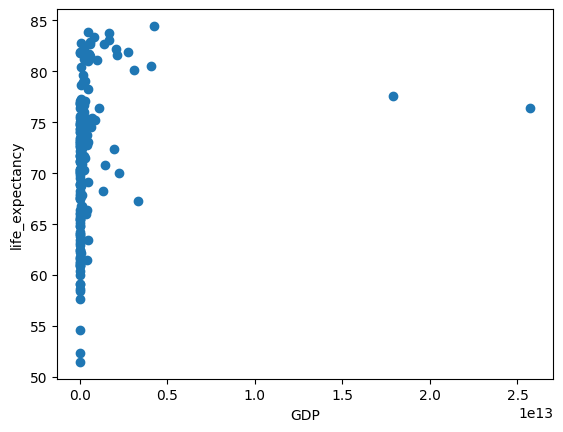

In [11]:
def plot_scatter(features, target, feature_to_plot):
    plt.scatter(features[feature_to_plot], target)
    plt.xlabel(feature_to_plot)
    plt.ylabel(target.name)

plot_scatter(features, target, "GDP")

We see that there is a positive trend: The higher the GDP, the higher the life expectancy. However, the data is poorly distributed: There are two economies with a very high GDP (China and the USA), while the remaining economies have a much lower GDP. 

We can fit a linear model using the following code:

In [12]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(features[["GDP"]], target)

LinearRegression()

This fits a model of the type

$expectancy = a_1 * GDP + b$.

The optimization algorithm to find the best parameter values is conveniently already implemented, and we can obtain the fitted parameter values as follows:

In [13]:
print("a1:", regression.coef_[0])
print("b:", regression.intercept_)

a1: 5.51722842336163e-13
b: 70.92773342259744


If we plot the values, we see the following picture:

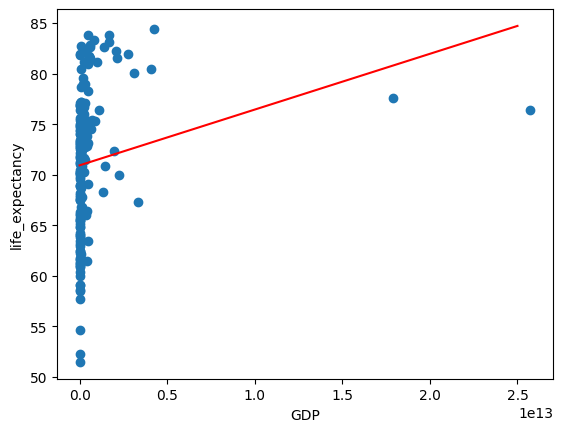

In [14]:
def plot_model(regression, index, xlow, xhigh):
    a = regression.coef_[index]
    b = regression.intercept_

    x = np.linspace(xlow, xhigh)
    y = a * x + b
    plt.plot(x, y, c="red")

plot_scatter(features, target, "GDP")
plot_model(regression, 0, 0, 2.5e13)

We see that the fit is rather poor. We can calculate the error as follows:

In [15]:
from sklearn.metrics import mean_absolute_error

def calculate_metric(regression, features, target):
    # Calculate the prediction
    predictions = regression.predict(features)
    return mean_absolute_error(target, predictions)

print("Mean Absolute Error:", calculate_metric(regression, features[["GDP"]], target))

Mean Absolute Error: 5.621776168613481


Our model is off by 5.62 years on average, which quite bad. Let's see if we can improve this.

### Feature Engineering: GDP

We can visually see on the scatter plot that a straight line is a poor fit. In order to improve, we can transform the GDP such that a straight line is a better fit. A good transformation to try is a logarithmic transformation - this will bring the extreme values closer together.

As a reminder: The logarithm with base 10 basically calculates how many zeros a number has.

In [23]:
np.log10(5)

0.6989700043360189

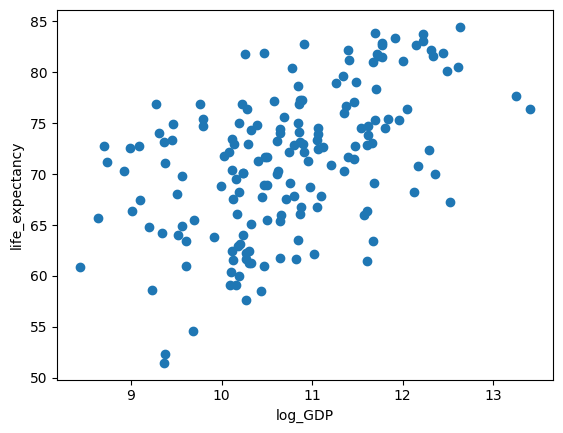

In [24]:
# Calculate the logarithm of the GDP
features["log_GDP"] = np.log10(features["GDP"])

# Now if we create a scatter plot:
plot_scatter(features, target, "log_GDP")

Visually, it seems like a straight line may be a better fit.

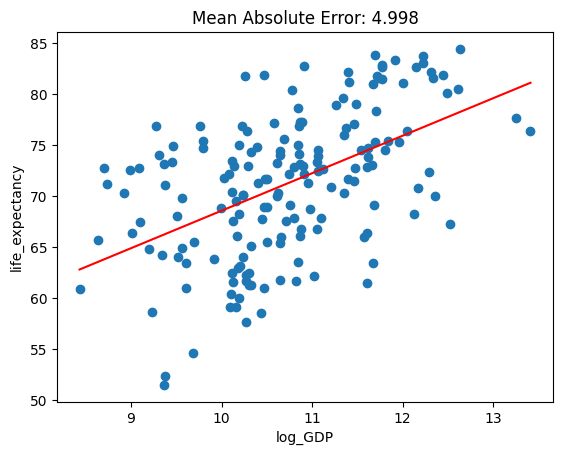

In [26]:
from sklearn.linear_model import LinearRegression

def plot_single_feature_fit(features, target, column):
    # Create a Fit
    regression = LinearRegression()
    regression.fit(features[[column]], target)

    plot_scatter(features, target, column)
    plot_model(regression, 0, features[column].min(), features[column].max())

    plt.title(f"Mean Absolute Error: {calculate_metric(regression, features[[column]], target):.3f}")

plot_single_feature_fit(features, target, "log_GDP")


We see that thanks to this transformation, we have improved our model by 0.6 years. This process of transforming a feature to improve the overall performance is called **feature engineering**.

### Feature Engineering: GDP per Capita
Another way to perform feature engineering on GDP is to calculate the GDP per capita. By dividing the total economic power by the amount of people in the country, we will obtain a better indicator of how much money there is available per person.

We calculate the GDP per capita as follows:

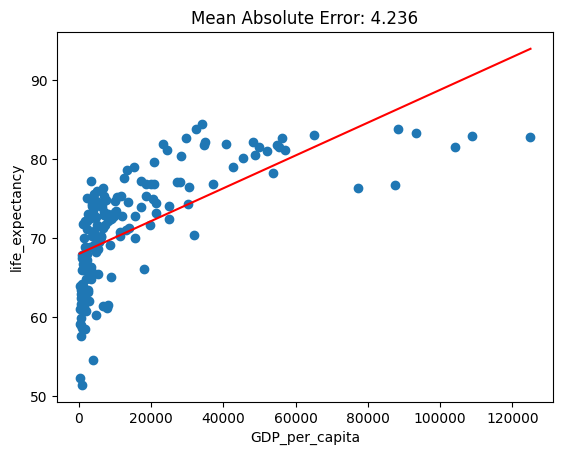

In [27]:
features["GDP_per_capita"] = features["GDP"] / features["population"]

plot_single_feature_fit(features, target, "GDP_per_capita")

The fit has again greatly improved by creating this new feature, GDP per capita. We can improve the fit even further by calculating the logarithm:

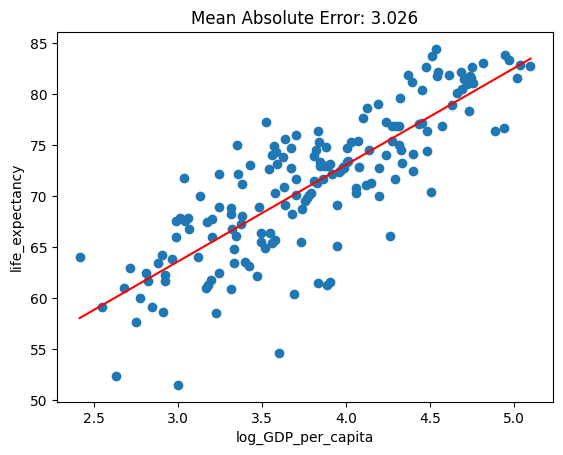

In [28]:
features["log_GDP_per_capita"] = np.log10(features["GDP_per_capita"])
plot_single_feature_fit(features, target, "log_GDP_per_capita")

In this transformation, a straight line looks like a good fit. We have now greatly improved the model: While GDP alone gave us an average error of 5.6, we have now decreased the error to 3.0. 

### Feature Engineering: CHE
Now let's look at another feature: Current health expenditure (CHE) per capita in US$. If we just use the feature directly, we obtain the following fit:

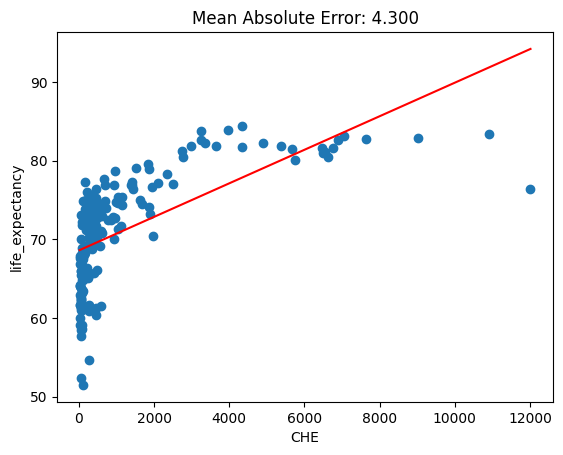

In [29]:
plot_single_feature_fit(features, target, "CHE")

Can you engineer a feature from CHE, such that the fit is improved further?

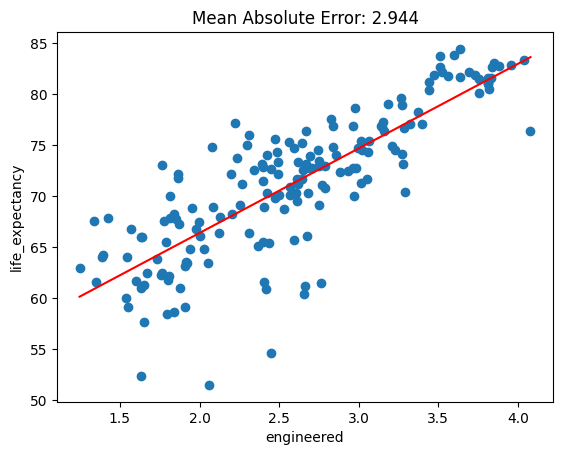

In [34]:
che = features["CHE"]

# CHANGE THIS
features["engineered"] = np.log10(che)  # do some transformation here

# Useful functions:
# - che ** a       for some value of a, che^a for every entry in che
# - 1 / che        calculate the inverse
# - np.sqrt(che)   calculate the square root
# - np.exp(che)    to calculate e^che for every value in che
# - np.log10(che)  to calculate the logarithm 
# 
# a list of all mathematical functions of numpy can be found here: 
# https://numpy.org/doc/stable/reference/routines.math.html
#
# If you want to multiply with or divide by another feature, you can do this as follows:
# features["engineered"] = che * features["other_feature"]
# features["engineered"] = che / features["other_feature"]
#
# And you can find a list of all features by running:
# print(features.columns)

plot_single_feature_fit(features, target, "engineered")

## Multiple Economic Indicators
Now let's see if we can improve the fit further by taking into account multiple features.

### GDP per capita and our Engineered Feature
We start off by looking at the performance if we use log(GDP per capita) and our engineered feature. We can visualize the data on a three-dimensional scatter plot.


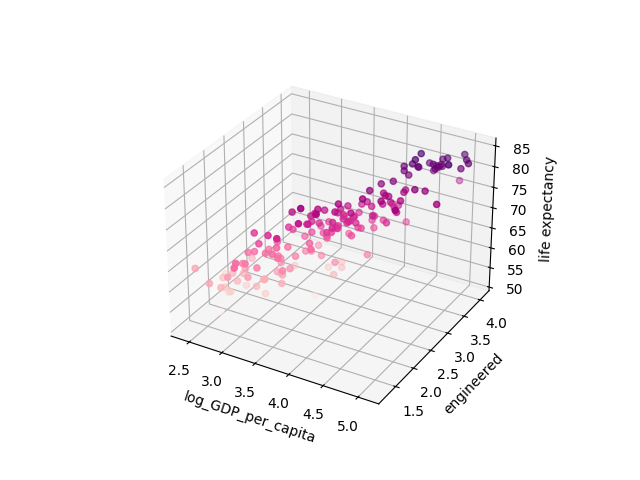

In [35]:
def plot_scatter(features, feature_x, feature_y, target, ax):
    ax.scatter(features[feature_x], features[feature_y], target, c=target, cmap="RdPu")
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_zlabel("life expectancy")

%matplotlib ipympl

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plot_scatter(features, "log_GDP_per_capita", "engineered", target, ax)

We can fit the model using two features and calculate our error as follows:

In [36]:
regression = LinearRegression()

# define the columns to use in the regression
columns = ["log_GDP_per_capita", "engineered"]

regression.fit(features[columns], target)

print("Mean Absolute Error:", calculate_metric(regression, features[columns], target))

Mean Absolute Error: 2.9041005319986115


Using the two features toghether indeed improved our model. 

### Looking at the Model

Our model is now a function that takes two inputs, `log_GDP_per_capita` and `engineered`, and outputs a single prediction. We can visualize it using a three-dimensional plot:

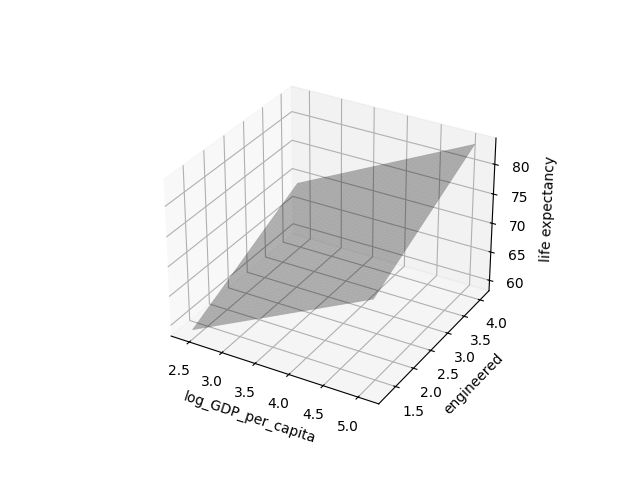

In [37]:
def linspace_from_feature(feature):
    return np.linspace(feature.min(), feature.max())

def plot_surface(features, feature_x, feature_y, regression, ax):
    linspace_x = linspace_from_feature(features[feature_x])
    linspace_y = linspace_from_feature(features[feature_y])

    x, y = np.meshgrid(linspace_x, linspace_y)

    df = pd.DataFrame(
        {feature_x: x.flatten(), feature_y: y.flatten()}
    )
    df["prediction"] = regression.predict(df)

    pivoted = df.pivot(index=feature_y, columns=feature_x, values="prediction")

    ax.plot_surface(x, y, pivoted.values, alpha=.3, color="k")

    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_zlabel("life expectancy")


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plot_surface(features, "log_GDP_per_capita", "engineered", regression, ax)

A linear regression with two input variables will fit a surface through the points. We can visualize both the true data points and the model as follows:

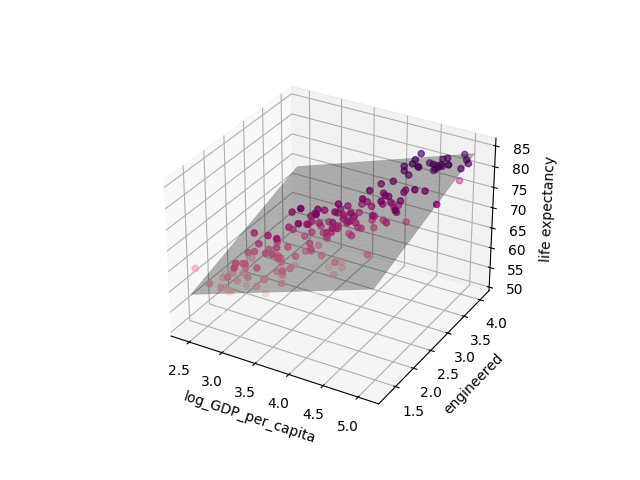

In [38]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plot_surface(features, "log_GDP_per_capita", "engineered", regression, ax)
plot_scatter(features, "log_GDP_per_capita", "engineered", target, ax)

### Even More Features

We can add even more features to our model. We can no longer visualize these models - such visualizations would require more than three dimensions. But the process of fitting and evaluating remains the same.

Let's add the fine particular matter information. 


In [40]:
regression = LinearRegression()

# define the columns to use in the regression
columns = ["log_GDP_per_capita", "engineered", "fine_particular_matter"]

regression.fit(features[columns], target)

print("Mean Absolute Error:", calculate_metric(regression, features[columns], target))

Mean Absolute Error: 2.9328334602569752


This did not improve the fit - somewhat surprisingly. This has two interpretations:
- Air quality does not affect the life expectancy, or
- air quality is already captured by the other variables.

### Exercise: Find the best model

Try out different feature combinations. With what combination of features can we obtain the best model?


In [41]:
# all possible columns:
features.columns

Index(['population', 'GDP', 'pol3', 'dpt3', 'prevalence_obesity',
       'fine_particular_matter', 'hepB', 'CHE', 'prevalence_underweight',
       'alcohol_consumption', 'log_GDP', 'GDP_per_capita',
       'log_GDP_per_capita', 'engineered'],
      dtype='object')

In [47]:
# CHANGE THIS
# put all features you want to use in this list
columns = ['population', 'GDP', 'pol3', 'dpt3', 'prevalence_obesity',
       'fine_particular_matter', 'hepB', 'CHE', 'prevalence_underweight',
       'alcohol_consumption', 'log_GDP', 'GDP_per_capita',
       'log_GDP_per_capita', 'engineered']

# DON'T CHANGE THIS
regression = LinearRegression()
regression.fit(features[columns], target)

print("Mean Absolute Error:", calculate_metric(regression, features[columns], target))

Mean Absolute Error: 2.6791907186216104


**Bonus**: Can you improve your model even further, by doing more feature engineering?

In [ ]:
# you can create a new features like this:
features["new_feature_1"] = 1  # put some expression here instead of 1
features["new_feature_2"] = 2

# then add the new feature name to the list
columns = ["log_GDP_per_capita", "engineered", "fine_particular_matter", "new_feature_1", "new_feature_2"]

# and run the following
# DON'T CHANGE THIS
regression = LinearRegression()
regression.fit(features[columns], target)

print("Mean Absolute Error:", calculate_metric(regression, features[columns], target))

### Exercise
Write down a definition for the following terms:

- **target**:
- **feature**:
- **feature engineering**:
- **linear regression**:


## Appendix: Data Combination

Here's the code for combining the original data into a single dataframe. No need to understand this.

In [ ]:
import os

def read_who_data(path, file, description_file):
    df = pd.read_csv(path + file)
    pivoted = df.pivot(index="SpatialDimValueCode", columns="Indicator", values="FactValueNumeric")

    # name column after file (the original column names are impossibly long)
    new_column_name, _ = os.path.splitext(file)
    measure_name = pivoted.columns[0]

    # append the renaming to the description file
    with open(description_file, mode="a") as file:
        file.write(f"{new_column_name}: {measure_name}\n")

    return pivoted.rename({measure_name: new_column_name}, axis=1)

def read_world_bank_data(path, file, description_file):
    df = pd.read_csv(path + file, sep=",", skiprows=3)
    indicator_name = df["Indicator Name"].iloc[0]

    # name column after file (the original column names are impossibly long)
    new_column_name, _ = os.path.splitext(file)

    # append the renaming to the description file
    with open(description_file, mode="a") as file:
        file.write(f"{new_column_name}: {indicator_name}\n")

    return df.set_index(["Country Name", "Country Code"])[["2022"]].rename({"2022": new_column_name}, axis=1)

def read_gdp():
    df = pd.read_csv("data/world_bank_data/gdp.csv", sep=",")
    return df.set_index("Country Code")[["Country Name", "2022"]].rename({"2022": "GDP_per_capita"}, axis=1)


def create_dataset():
    # description file is generated automatically
    description_file = "data/who_data/description.txt"
    if os.path.exists(description_file):
        os.remove(description_file)

    who_data = pd.concat(
        [
            read_who_data("data/who_data/", file, description_file)
            for file in os.listdir("data/who_data")
        ],
        axis=1
    )

    world_bank_data = pd.concat(
        [
            read_world_bank_data("data/world_bank_data/", file, description_file)
            for file in os.listdir("data/world_bank_data")
            if file.endswith(".csv")
        ],
        axis=1
    ).reset_index(level=0)
    full_data = world_bank_data.join(who_data, how="inner")
    return full_data


who_data = create_dataset()
who_data.to_csv("data/who_data.csv", index=True)